### Optical Flow with Lucas-Kanade method

In [2]:
import numpy as np
import cv2
  
cap = cv2.VideoCapture('cars.mp4')
  
# params for corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
  
# Parameters for lucas kanade optical flow
lk_params = dict( winSize = (15, 15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                              10, 0.03))
  
# Create some random colors
color = np.random.randint(0, 255, (100, 3))
  
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame,
                        cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None,
                             **feature_params)
  
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
  
while(1):
      
    ret, frame = cap.read()
    frame_gray = cv2.cvtColor(frame,
                              cv2.COLOR_BGR2GRAY)
  
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray,
                                           frame_gray,
                                           p0, None,
                                           **lk_params)
  
    # Select good points
    good_new = p1[st == 1]
    good_old = p0[st == 1]
  
    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, 
                                       good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (a, b), (c, d),
                        color[i].tolist(), 2)
          
        frame = cv2.circle(frame, (a, b), 5,
                           color[i].tolist(), -1)
          
    img = cv2.add(frame, mask)
  
    cv2.imshow('frame', img)
      
    k = cv2.waitKey(25)
    if k == 27:
        break
  
    # Updating Previous frame and points 
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)
  
cv2.destroyAllWindows()
cap.release()

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\video\src\lkpyramid.cpp:1257: error: (-215:Assertion failed) (npoints = prevPtsMat.checkVector(2, CV_32F, true)) >= 0 in function 'cv::`anonymous-namespace'::SparsePyrLKOpticalFlowImpl::calc'


### Dense optical flow

In [3]:
import cv2 as cv
import numpy as np
import matplotlib as plt  
  
# The video feed is read in as
# a VideoCapture object
cap = cv.VideoCapture("cars.mp4")
  
# ret = a boolean return value from
# getting the frame, first_frame = the
# first frame in the entire video sequence
ret, first_frame = cap.read()
  
# Converts frame to grayscale because we
# only need the luminance channel for
# detecting edges - less computationally 
# expensive
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
  
# Creates an image filled with zero
# intensities with the same dimensions 
# as the frame
mask = np.zeros_like(first_frame)
  
# Sets image saturation to maximum
mask[..., 1] = 255
  
while(cap.isOpened()):
      
    # ret = a boolean return value from getting
    # the frame, frame = the current frame being
    # projected in the video
    ret, frame = cap.read()
      
    # Opens a new window and displays the input
    # frame
    cv.imshow("input", frame)
      
    # Converts each frame to grayscale - we previously 
    # only converted the first frame to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
      
    # Calculates dense optical flow by Farneback method
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray, 
                                       None,
                                       0.5, 3, 15, 3, 5, 1.2, 0)
      
    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
      
    # Sets image hue according to the optical flow 
    # direction
    mask[..., 0] = angle * 180 / np.pi / 2
      
    # Sets image value according to the optical flow
    # magnitude (normalized)
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
      
    # Converts HSV to RGB (BGR) color representation
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
      
    # Opens a new window and displays the output frame
    cv.imshow("dense optical flow", rgb)
      
    # Updates previous frame
    prev_gray = gray
      
    # Frames are read by intervals of 1 millisecond. The
    # programs breaks out of the while loop when the
    # user presses the 'q' key
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
  
# The following frees up resources and
# closes all windows
cap.release()
cv.destroyAllWindows()

KeyboardInterrupt: 

### Visualizing image in different color spaces RGB Image

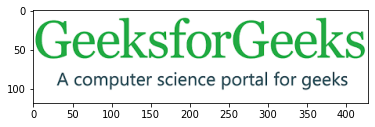

In [4]:
import cv2
import matplotlib.pyplot as plt
i=cv2.imread("GfG.png")
image=cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
plt.imshow(image)

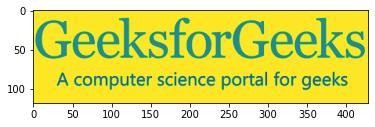

In [5]:
# Gray Scale Image
img=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

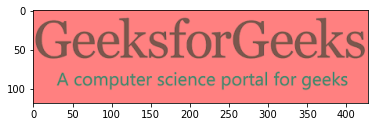

In [6]:
# YCrCb Color Space
img=cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
plt.imshow(img)

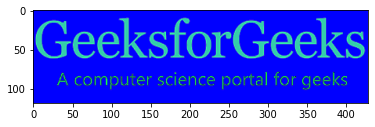

In [7]:
# HSV color space
img=cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(img)

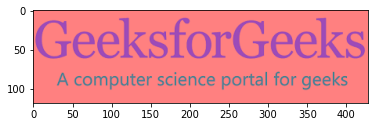

In [8]:
# LAB color space
img=cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


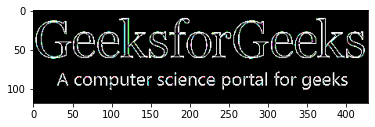

In [9]:
# Edge map of image
laplacian = cv2.Laplacian(image, cv2.CV_64F)
plt.imshow(laplacian)

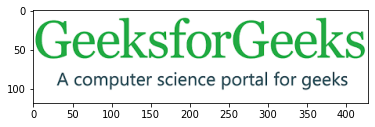

In [11]:
# Heat map of image
plt.imshow(image,cmap='hot')

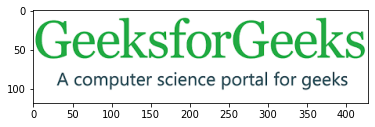

In [13]:
#Spectral Image map
plt.imshow(image,cmap='nipy_spectral')

### Find Co-ordinates of Contours using OpenCV

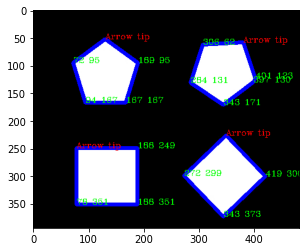

In [14]:
# Python code to find the co-ordinates of
# the contours detected in an image.
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Reading image
font = cv2.FONT_HERSHEY_COMPLEX
img2 = cv2.imread('test.png', cv2.IMREAD_COLOR)
  
# Reading same image in another 
# variable and converting to gray scale.
img = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE)
  
# Converting image to a binary image
# ( black and white only image).
_, threshold = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY)
  
# Detecting contours in image.
contours, _= cv2.findContours(threshold, cv2.RETR_TREE,
                               cv2.CHAIN_APPROX_SIMPLE)
  
# Going through every contours found in the image.
for cnt in contours :
  
    approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True)
  
    # draws boundary of contours.
    cv2.drawContours(img2, [approx], 0, (0, 0, 255), 5) 
  
    # Used to flatted the array containing
    # the co-ordinates of the vertices.
    n = approx.ravel() 
    i = 0
  
    for j in n :
        if(i % 2 == 0):
            x = n[i]
            y = n[i + 1]
  
            # String containing the co-ordinates.
            string = str(x) + " " + str(y) 
  
            if(i == 0):
                # text on topmost co-ordinate.
                cv2.putText(img2, "Arrow tip", (x, y),
                                font, 0.5, (255, 0, 0)) 
            else:
                # text on remaining co-ordinates.
                cv2.putText(img2, string, (x, y), 
                          font, 0.5, (0, 255, 0)) 
        i = i + 1
  
# Showing the final image.
plt.imshow(img2)

### Find and Draw Contours using OpenCV

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Let's load a simple image with 3 black squares
image = cv2.imread('test.png')
cv2.waitKey(0)
  
# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2.waitKey(0)
  
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
#.imshow('Canny Edges After Contouring', edged)

  
print("Number of Contours found = " + str(len(contours)))
  
# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image)

## Draw a rectangular shape and extract objects using Python’s OpenCV

In [4]:
# Python program to extract rectangular
# Shape using OpenCV in Python3
import cv2
import numpy as np
  
drawing = False     # true if mouse is pressed
mode = True         # if True, draw rectangle.
ix, iy = -1, -1
  
# mouse callback function
def draw_circle(event, x, y, flags, param):
    global ix, iy, drawing, mode
      
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
      
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), 3)
                a = x
                b = y
                if a != x | b != y:
                    cv2.rectangle(img, (ix, iy), (x, y), (0, 0, 0), -1)
            else:
                cv2.circle(img, (x, y), 5, (0, 0, 255), -1)
      
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), 2)
      
        else:
            cv2.circle(img, (x, y), 5, (0, 0, 255), -1)
      
img = np.zeros((512, 512, 3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

In [3]:
# Write Python code here
# import the necessary packages
import cv2
import argparse
  
# now let's initialize the list of reference point
ref_point = []
crop = False
  
def shape_selection(event, x, y, flags, param):
    # grab references to the global variables
    global ref_point, crop
  
    # if the left mouse button was clicked, record the starting
    # (x, y) coordinates and indicate that cropping is being performed
    if event == cv2.EVENT_LBUTTONDOWN:
        ref_point = [(x, y)]
  
    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        ref_point.append((x, y))
  
        # draw a rectangle around the region of interest
        cv2.rectangle(image, ref_point[0], ref_point[1], (0, 255, 0), 2)
        plt.imshow(image)
  
  
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required = True, help ="Path to the image")
args = vars(ap.parse_args())
  
# load the image, clone it, and setup the mouse callback function
image = cv2.imread(args["image"])
clone = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", shape_selection)
  
  
# keep looping until the 'q' key is pressed
while True:
    # display the image and wait for a keypress
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF
  
    # press 'r' to reset the window
    if key == ord("r"):
        image = clone.copy()
  
    # if the 'c' key is pressed, break from the loop
    elif key == ord("c"):
        break
  
if len(ref_point) == 2:
    crop_img = clone[ref_point[0][1]:ref_point[1][1], ref_point[0][0]:
                                                           ref_point[1][0]]
    plt.imshow(crop_img)
 


usage: ipykernel_launcher.py [-h] -i IMAGE
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: 2

c:\users\olaab\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Python OpenCV | cv2.rectangle() method

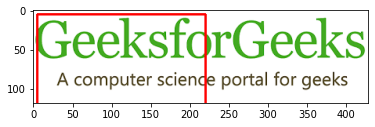

In [2]:

# Python program to explain cv2.rectangle() method 
   
# importing cv2 
import cv2 
import matplotlib.pyplot as plt   
# path 
path = 'GfG.png'
   
# Reading an image in default mode
image = cv2.imread(path)
   
# Window name in which image is displayed
window_name = 'Image'
  
# Start coordinate, here (5, 5)
# represents the top left corner of rectangle
start_point = (5, 5)
  
# Ending coordinate, here (220, 220)
# represents the bottom right corner of rectangle
end_point = (220, 220)
  
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
image = cv2.rectangle(image, start_point, end_point, color, thickness)
  
# Displaying the image 
plt.imshow( image) 

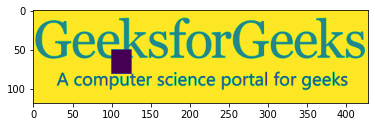

In [5]:
# Python program to explain cv2.rectangle() method 
    
# importing cv2 
import cv2 
    
# path 
path = 'GfG.png'
    
# Reading an image in grayscale mode
image = cv2.imread(path, 0)
    
# Window name in which image is displayed
window_name = 'Image'
   
# Start coordinate, here (100, 50)
# represents the top left corner of rectangle
start_point = (100, 50)
   
# Ending coordinate, here (125, 80)
# represents the bottom right corner of rectangle
end_point = (125, 80)
   
# Black color in BGR
color = (0, 0, 0)
   
# Line thickness of -1 px
# Thickness of -1 will fill the entire shape
thickness = -1
   
# Using cv2.rectangle() method
# Draw a rectangle of black color of thickness -1 px
image = cv2.rectangle(image, start_point, end_point, color, thickness)
   
# Displaying the image 
plt.imshow(image) 

### Python OpenCV | cv2.putText() method

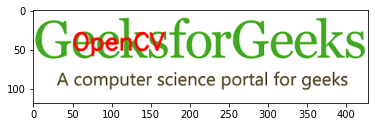

In [6]:
# Python program to explain cv2.putText() method
    
# importing cv2
import cv2
    
# path
path = 'GfG.png'
    
# Reading an image in default mode
image = cv2.imread(path)
    
# Window name in which image is displayed
window_name = 'Image'
  
# font
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
org = (50, 50)
  
# fontScale
fontScale = 1
   
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
   
# Using cv2.putText() method
image = cv2.putText(image, 'OpenCV', org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
   
# Displaying the image
plt.imshow(image)

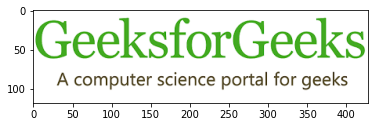

In [7]:
# Python program to explain cv2.putText() method
    
# importing cv2
import cv2
    
# path
path = 'GfG.png'
    
# Reading an image in default mode
image = cv2.imread(path)
    
# Window name in which image is displayed
window_name = 'Image'
  
# text
text = 'GeeksforGeeks'
  
# font
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
org = (00, 185)
  
# fontScale
fontScale = 1
   
# Red color in BGR
color = (0, 0, 255)
  
# Line thickness of 2 px
thickness = 2
   
# Using cv2.putText() method
image = cv2.putText(image, text, org, font, fontScale, 
                 color, thickness, cv2.LINE_AA, False)
  
# Using cv2.putText() method
image = cv2.putText(image, text, org, font, fontScale,
                  color, thickness, cv2.LINE_AA, True) 
  
# Displaying the image
plt.imshow(image) 